In [786]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# 1 DATA ACQUISITION

In [787]:
df = pd.read_excel('B_Ordenes_04-10-2021.xlsx', decimal=',', thousands='.')


In [788]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [789]:
df.head()

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCIÓN DE ENTREGA,DIRECCIÓN FACTURACIÓN,CENTRO COSTO,PRESUPUESTO,COMPAÑÍA COMPRADORA,ESTADO,PRODUCTO O SERVICIO,CÓDIGO PRODUCTO,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ÚLTIMO MOVIMIENTO
0,# 40213,# 3,2020-04-27,2020-04-27,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co,NaN,100.00,100.00,35000,35000,0,3500000,3500000,2020-04-27
1,# 40207,# 2,2020-04-23,2020-04-23,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Careta Re.co,NaN,10.00,nan,35000,35000,0,350000,350000,2020-04-27
2,# 40207,# 2,2020-04-23,2020-04-23,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Pali,NaN,4.00,nan,41000,41000,0,164000,164000,2020-04-27
3,# 40206,# 1,2020-04-23,2020-04-23,2020-04-23,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co,NaN,5.00,5.00,35000,35000,0,175000,175000,2020-04-23
4,# 1078,# 1,2019-11-27,2019-11-27,2019-11-27,Alimentos y Bebidas,Alimentos preparados y conservados,Comprador Proveedor Prod 123 ASD,negociadorprod123@yopmail.com,compradorprod123@yopmail.com,Cra 123,Cra 123,NaN,Prepuesto 1,Comprador Prod 123 ASD,Recibido,Arroz Italiano,AZI132,2.00,2.00,56000,66640,10640,107957,133280,2019-11-27


Describe and info of the df

In [790]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO PEDIDO            499 non-null    object 
 1   ORDEN NÚMERO             499 non-null    object 
 2   FECHA ORDEN              499 non-null    object 
 3   FECHA ENTREGA            326 non-null    object 
 4   FECHA APROBACIÓN         434 non-null    object 
 5   CATEGORÍA                499 non-null    object 
 6   SUBCATEGORÍA             499 non-null    object 
 7   PROVEEDOR                499 non-null    object 
 8   USUARIO                  499 non-null    object 
 9   USUARIO APROBADOR        434 non-null    object 
 10  DIRECCIÓN DE  ENTREGA    499 non-null    object 
 11  DIRECCIÓN FACTURACIÓN    294 non-null    object 
 12  CENTRO COSTO             163 non-null    object 
 13  PRESUPUESTO              354 non-null    object 
 14  COMPAÑÍA COMPRADORA      4

In [791]:
df.describe()

,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA
count,499.00,246.00,499.00,499.00,499.00,499.00,499.00
mean,117.40,221.85,"110,369.57","127,890.27","17,520.71","1,062,507.68","1,295,925.21"
std,415.76,564.95,"470,385.23","551,989.52","82,276.31","3,226,909.55","3,978,707.84"
min,0.50,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,"1,966.50","2,200.00",0.00,"5,000.00","5,268.00"
50%,2.00,3.00,"8,920.00","9,500.00",950.00,"28,350.00","35,000.00"
75%,4.50,16.50,"33,613.00","35,000.00","5,588.00","157,630.50","175,000.00"
max,"3,500.00","3,500.00","2,941,176.00","3,500,000.00","558,824.00","32,058,504.00","39,578,400.00"


# DATA PREPARATION

# 1. Data integration

There are no more data integration to join. I have only the .xlsx file

# 2. IRELEVANT VARIABLES

## 2.1 Irrelevant columns

Until we know the objective of this project, we couldn´t drop some variables, but for now, let´s do a clasical ML model

In [792]:
df.head(2)

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCIÓN DE ENTREGA,DIRECCIÓN FACTURACIÓN,CENTRO COSTO,PRESUPUESTO,COMPAÑÍA COMPRADORA,ESTADO,PRODUCTO O SERVICIO,CÓDIGO PRODUCTO,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ÚLTIMO MOVIMIENTO
0,# 40213,# 3,2020-04-27,2020-04-27,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co,NaN,100.00,100.00,35000,35000,0,3500000,3500000,2020-04-27
1,# 40207,# 2,2020-04-23,2020-04-23,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Careta Re.co,NaN,10.00,nan,35000,35000,0,350000,350000,2020-04-27


In [793]:
for i in df.columns:
    print('------------------', i, '------------------' )
    percentage = df[i].value_counts()/df[i].count()*100
    
    print(percentage)

------------------ NÚMERO PEDIDO ------------------
# 45969                   2.00
# 47530                   1.80
# 45895                   1.80
# 368                     1.60
# 37478                   1.60
                  ...         
# 1048                    0.20
# 1066                    0.20
# 1074                    0.20
# 1056                    0.20
# 40206                   0.20
Name: NÚMERO PEDIDO, Length: 214, dtype: float64
------------------ ORDEN NÚMERO ------------------
# 23                    3.01
# 3                     3.01
# 6                     2.81
# 11                    2.61
# 4                     2.40
                ...         
# 124                   0.20
# 82                    0.20
# 86                    0.20
# 130                   0.20
# 169                   0.20
Name: ORDEN NÚMERO, Length: 188, dtype: float64
------------------ FECHA ORDEN ------------------
2020-02-04                  13.03
2021-03-18                   3.21
2021-07-27            

In [794]:
df.columns = df.columns.str.replace(' ', '_')

In [795]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'FECHA_ORDEN', 'FECHA_ENTREGA',
       'FECHA_APROBACIÓN', 'CATEGORÍA', 'SUBCATEGORÍA', 'PROVEEDOR', 'USUARIO',
       'USUARIO_APROBADOR', 'DIRECCIÓN_DE__ENTREGA', 'DIRECCIÓN_FACTURACIÓN',
       'CENTRO_COSTO', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'PRODUCTO_O_SERVICIO', 'CÓDIGO_PRODUCTO', 'CANTIDAD_PEDIDA',
       'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA',
       'TOTAL_SIN_IVA', 'TOTAL_+_IVA', 'FECHA_ÚLTIMO_MOVIMIENTO'],
      dtype='object')

In [796]:
cols_to_drop = ['USUARIO', 'USUARIO_APROBADOR', 'DIRECCIÓN_DE__ENTREGA', 'DIRECCIÓN_FACTURACIÓN']

In [797]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO_PEDIDO            499 non-null    object 
 1   ORDEN_NÚMERO             499 non-null    object 
 2   FECHA_ORDEN              499 non-null    object 
 3   FECHA_ENTREGA            326 non-null    object 
 4   FECHA_APROBACIÓN         434 non-null    object 
 5   CATEGORÍA                499 non-null    object 
 6   SUBCATEGORÍA             499 non-null    object 
 7   PROVEEDOR                499 non-null    object 
 8   CENTRO_COSTO             163 non-null    object 
 9   PRESUPUESTO              354 non-null    object 
 10  COMPAÑÍA_COMPRADORA      499 non-null    object 
 11  ESTADO                   499 non-null    object 
 12  PRODUCTO_O_SERVICIO      499 non-null    object 
 13  CÓDIGO_PRODUCTO          120 non-null    object 
 14  CANTIDAD_PEDIDA          4

## 2.2 Duplicated rows

In [799]:
df.duplicated(keep='first').sum()

0

In [800]:
df.drop_duplicates(keep='first', inplace=True)

In [801]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO_PEDIDO            499 non-null    object 
 1   ORDEN_NÚMERO             499 non-null    object 
 2   FECHA_ORDEN              499 non-null    object 
 3   FECHA_ENTREGA            326 non-null    object 
 4   FECHA_APROBACIÓN         434 non-null    object 
 5   CATEGORÍA                499 non-null    object 
 6   SUBCATEGORÍA             499 non-null    object 
 7   PROVEEDOR                499 non-null    object 
 8   CENTRO_COSTO             163 non-null    object 
 9   PRESUPUESTO              354 non-null    object 
 10  COMPAÑÍA_COMPRADORA      499 non-null    object 
 11  ESTADO                   499 non-null    object 
 12  PRODUCTO_O_SERVICIO      499 non-null    object 
 13  CÓDIGO_PRODUCTO          120 non-null    object 
 14  CANTIDAD_PEDIDA          4

# 3. STATISTICAL DESCRIPTION

In [802]:
df.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
count,499.00,246.00,499.00,499.00,499.00,499.00,499.00
mean,117.40,221.85,"110,369.57","127,890.27","17,520.71","1,062,507.68","1,295,925.21"
std,415.76,564.95,"470,385.23","551,989.52","82,276.31","3,226,909.55","3,978,707.84"
min,0.50,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,"1,966.50","2,200.00",0.00,"5,000.00","5,268.00"
50%,2.00,3.00,"8,920.00","9,500.00",950.00,"28,350.00","35,000.00"
75%,4.50,16.50,"33,613.00","35,000.00","5,588.00","157,630.50","175,000.00"
max,"3,500.00","3,500.00","2,941,176.00","3,500,000.00","558,824.00","32,058,504.00","39,578,400.00"


In [803]:
df['PRECIO_UNITARIO'] = pd.to_numeric(df['PRECIO_UNITARIO'], downcast="float")

df['PRECIO_UNITARIO_+_IVA'] = pd.to_numeric(df['PRECIO_UNITARIO_+_IVA'], downcast="float")

df['TOTAL_SIN_IVA'] = pd.to_numeric(df['TOTAL_SIN_IVA'], downcast="float")

df['TOTAL_+_IVA'] = pd.to_numeric(df['TOTAL_+_IVA'], downcast="float")


In [804]:
df.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
count,499.00,246.00,499.00,499.00,499.00,499.00,499.00
mean,117.40,221.85,"110,369.52","127,890.26","17,520.71","1,062,506.38","1,295,928.12"
std,415.76,564.95,"470,385.31","551,989.56","82,276.31","3,226,913.00","3,978,706.75"
min,0.50,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,"1,966.50","2,200.00",0.00,"5,000.00","5,268.00"
50%,2.00,3.00,"8,920.00","9,500.00",950.00,"28,350.00","35,000.00"
75%,4.50,16.50,"33,613.00","35,000.00","5,588.00","157,630.50","175,000.00"
max,"3,500.00","3,500.00","2,941,176.00","3,500,000.00","558,824.00","32,058,504.00","39,578,400.00"


In [805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO_PEDIDO            499 non-null    object 
 1   ORDEN_NÚMERO             499 non-null    object 
 2   FECHA_ORDEN              499 non-null    object 
 3   FECHA_ENTREGA            326 non-null    object 
 4   FECHA_APROBACIÓN         434 non-null    object 
 5   CATEGORÍA                499 non-null    object 
 6   SUBCATEGORÍA             499 non-null    object 
 7   PROVEEDOR                499 non-null    object 
 8   CENTRO_COSTO             163 non-null    object 
 9   PRESUPUESTO              354 non-null    object 
 10  COMPAÑÍA_COMPRADORA      499 non-null    object 
 11  ESTADO                   499 non-null    object 
 12  PRODUCTO_O_SERVICIO      499 non-null    object 
 13  CÓDIGO_PRODUCTO          120 non-null    object 
 14  CANTIDAD_PEDIDA          4

In [806]:
df['FECHA_ORDEN'] = pd.to_datetime(df['FECHA_ORDEN'], format='%Y-%m-%d')
df['FECHA_ENTREGA'] = pd.to_datetime(df['FECHA_ENTREGA'], format='%Y-%m-%d')
df['FECHA_APROBACIÓN'] = pd.to_datetime(df['FECHA_APROBACIÓN'], format='%Y-%m-%d')
df['FECHA_ÚLTIMO_MOVIMIENTO'] = pd.to_datetime(df['FECHA_ÚLTIMO_MOVIMIENTO'], format='%Y-%m-%d')

In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            499 non-null    object        
 1   ORDEN_NÚMERO             499 non-null    object        
 2   FECHA_ORDEN              499 non-null    datetime64[ns]
 3   FECHA_ENTREGA            326 non-null    datetime64[ns]
 4   FECHA_APROBACIÓN         434 non-null    datetime64[ns]
 5   CATEGORÍA                499 non-null    object        
 6   SUBCATEGORÍA             499 non-null    object        
 7   PROVEEDOR                499 non-null    object        
 8   CENTRO_COSTO             163 non-null    object        
 9   PRESUPUESTO              354 non-null    object        
 10  COMPAÑÍA_COMPRADORA      499 non-null    object        
 11  ESTADO                   499 non-null    object        
 12  PRODUCTO_O_SERVICIO      499 non-nul

In [808]:
df_Y = df.groupby(pd.Grouper(key='FECHA_ORDEN', freq="Y")).sum()
df_Y.head()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
FECHA_ORDEN,,,,,,,
2018-12-31,335.00,119.00,"23,438,632.00","27,889,500.00",4450868,"27,623,360.00","32,860,400.00"
2019-12-31,302.00,203.00,"4,264,790.00","4,892,660.00",627870,"11,421,161.00","13,037,000.00"
2020-12-31,"57,597.00","54,085.00","3,817,766.00","4,379,695.00",561929,"457,119,904.00","562,696,384.00"
2021-12-31,351.00,167.00,"23,553,226.00","26,655,392.00",3102166,"34,026,904.00","38,072,908.00"


## By year

In [809]:
px.bar(df_Y, y='TOTAL_+_IVA')

By Month

In [810]:
df_M = df.groupby(pd.Grouper(key='FECHA_ORDEN', freq="M")).sum()
df_M

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
FECHA_ORDEN,,,,,,,
2018-04-30,22.00,22.00,"126,722.00","150,800.00",24078,"643,529.00","765,800.00"
2018-05-31,167.00,35.00,"12,821,177.00","15,257,200.00",2436023,"16,009,326.00","19,051,100.00"
2018-06-30,17.00,4.00,"5,827,059.00","6,934,200.00",1107141,"6,003,529.00","7,144,200.00"
2018-07-31,13.00,0.00,"3,055,966.00","3,636,600.00",580634,"3,055,966.00","3,636,600.00"
2018-08-31,57.00,43.00,"760,303.00","904,000.00",143697,"982,379.00","1,162,000.00"
2018-09-30,37.00,12.00,"806,292.00","959,200.00",152908,"873,519.00","1,039,200.00"
2018-10-31,2.00,0.00,"35,113.00","41,500.00",6387,"35,113.00","41,500.00"
2018-11-30,8.00,0.00,"2,500.00","2,500.00",0,"8,500.00","8,500.00"
2018-12-31,12.00,3.00,"3,500.00","3,500.00",0,"11,500.00","11,500.00"


In [811]:
px.bar(df_M, y='TOTAL_+_IVA')

## Categoría

In [812]:
df_CAT = df.groupby('CATEGORÍA').sum()
df_CAT.sort_values(by='TOTAL_+_IVA', inplace=True, ascending=False)
df_CAT

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
CATEGORÍA,,,,,,,
Químicos y derivados,"41,470.00","39,265.00","941,596.00","1,120,505.00",178909,"328,347,104.00","405,366,784.00"
Almacenamiento y empaques,"15,445.00","14,584.00","435,483.00","518,228.00",82745,"107,912,064.00","133,223,824.00"
Tecnología e información,10.00,4.00,"18,260,872.00","21,000,000.00",2739128,"25,969,568.00","30,000,000.00"
Medicina y Salud,7.00,2.00,"17,667,056.00","21,020,000.00",3352944,"17,667,056.00","21,020,000.00"
Moda y accesorios,533.00,81.00,"2,151,273.00","2,560,000.00",408727,"15,466,219.00","18,825,000.00"
Alimentos y Bebidas,377.00,227.00,"2,322,740.00","2,384,265.00",61525,"8,730,769.00","8,864,909.00"
"Aseo, Cafetería y Oficina",455.00,229.00,"1,637,266.00","1,853,466.00",216200,"4,800,040.00","5,591,023.00"
Vehículos y repuestos,69.00,33.00,"2,200,752.00","2,200,752.00",0,"4,360,752.00","4,360,752.00"
Vigilancia y seguridad industrial,132.00,109.00,"146,588.00","146,700.00",112,"4,190,092.00","4,190,300.00"


In [813]:
px.bar(df_CAT, y='TOTAL_+_IVA')

In [814]:
px.bar(df_CAT, y='CANTIDAD_PEDIDA')

## Compañía compradora

In [815]:

df_Comp = df.groupby('COMPAÑÍA_COMPRADORA').sum()
df_Comp.sort_values(by='TOTAL_+_IVA', inplace=True, ascending=False)
df_Comp

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
COMPAÑÍA_COMPRADORA,,,,,,,
PLASTISOL SAS,"56,940.00","53,874.00","1,447,513.00","1,715,023.00",267510,"436,416,352.00","538,767,872.00"
PORTAL PRUEBAS,"1,294.00",458.00,"51,458,192.00","59,786,416.00",8328224,"86,547,696.00","100,399,320.00"
Caretas SAS,119.00,105.00,"146,000.00","146,000.00",0,"4,189,000.00","4,189,000.00"
Proveindustriales BPO S.A.S.,77.00,39.00,"1,249,501.00","1,352,971.00",103470,"1,733,383.00","1,899,721.00"
CONTACTO ARQUITECTURA S.A.S.,141.00,94.00,"276,458.00","302,227.00",25769,"739,565.00","811,498.00"
Eduardo Espitia Becerra,1.00,1.00,"400,752.00","400,752.00",0,"400,752.00","400,752.00"
Comprador Prod 123 ASD,3.00,3.00,"94,000.00","111,860.00",17860,"144,585.00","178,500.00"
SAVOR FRUIT SAS,10.00,0.00,"2,000.00","2,000.00",0,"20,000.00","20,000.00"


In [816]:
px.bar(df_Comp, y='TOTAL_+_IVA')

In [817]:
df_Comp_count = df.groupby('COMPAÑÍA_COMPRADORA').count()
df_Comp_count.sort_values(by='TOTAL_+_IVA', inplace=True, ascending=False)
df_Comp_count

,NÚMERO_PEDIDO,ORDEN_NÚMERO,FECHA_ORDEN,FECHA_ENTREGA,FECHA_APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,CENTRO_COSTO,PRESUPUESTO,ESTADO,PRODUCTO_O_SERVICIO,CÓDIGO_PRODUCTO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO
COMPAÑÍA_COMPRADORA,,,,,,,,,,,,,,,,,,,,,
PORTAL PRUEBAS,309,309,309,136,277,309,309,309,75,243,309,309,3,309,103,309,309,309,309,309,309
PLASTISOL SAS,89,89,89,89,87,89,89,89,68,68,89,89,21,89,83,89,89,89,89,89,89
Proveindustriales BPO S.A.S.,60,60,60,60,44,60,60,60,0,37,60,60,60,60,37,60,60,60,60,60,60
CONTACTO ARQUITECTURA S.A.S.,33,33,33,33,19,33,33,33,19,0,33,33,33,33,18,33,33,33,33,33,33
Caretas SAS,4,4,4,4,4,4,4,4,0,4,4,4,0,4,2,4,4,4,4,4,4
Comprador Prod 123 ASD,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
Eduardo Espitia Becerra,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1
SAVOR FRUIT SAS,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1


## Portal pruebas

In [818]:
df_Portal_Pruebas = df.loc[df['COMPAÑÍA_COMPRADORA']=='PORTAL PRUEBAS']
df_Portal_Pruebas

,NÚMERO_PEDIDO,ORDEN_NÚMERO,FECHA_ORDEN,FECHA_ENTREGA,FECHA_APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,CENTRO_COSTO,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CÓDIGO_PRODUCTO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO
129,# 48910,# 190,2021-09-28,2021-09-28,NaT,Alimentos y Bebidas,Aceites y grasas comestibles,Distri123,Centro de costos 2,NaN,PORTAL PRUEBAS,Pendiente por Aprobar,Litro Aceite industrial,NaN,1.00,nan,"25,000.00","29,750.00",4750,"25,000.00","29,750.00",2021-09-28
130,# 48910,# 189,2021-09-28,2021-09-28,NaT,"Aseo, Cafetería y Oficina",Elementos de aseo y limpieza,Proveedor 1K,Centro de costos 2,NaN,PORTAL PRUEBAS,Pendiente por Aprobar,Jabon antibacterial,NaN,1.00,nan,"5,000.00","5,950.00",950,"5,000.00","5,950.00",2021-09-28
131,# 48734,# 188,2021-09-13,2021-09-13,NaT,Vehículos y repuestos,Vehículos de motor,Proveedor 1K,NaN,NaN,PORTAL PRUEBAS,Pendiente por Aprobar,Batería de vehículo,NaN,1.00,nan,"180,000.00","180,000.00",0,"180,000.00","180,000.00",2021-09-13
132,# 48734,# 187,2021-09-13,2021-09-13,2021-09-28,Manufactura,Ferretería,PORTAL PRUEBAS,NaN,NaN,PORTAL PRUEBAS,Orden en Proceso,Martillo,NaN,1.00,nan,"15,000.00","17,850.00",2850,"15,000.00","17,850.00",2021-09-28
133,# 48530,# 186,2021-08-27,2021-08-28,NaT,Manufactura,Ferretería,PORTAL PRUEBAS,Centro de costos 2,NaN,PORTAL PRUEBAS,Pendiente por Aprobar,Martillo,NaN,1.00,nan,"15,000.00","17,850.00",2850,"15,000.00","17,850.00",2021-08-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,# 2,# 2,2018-04-30,NaT,2018-05-01,"Aseo, Cafetería y Oficina",Elementos de papelería,Suministros ABC,NaN,Presupuesto Mayo 2018,PORTAL PRUEBAS,Recibido,Grapadora,NaN,8.00,8.00,"33,613.00","40,000.00",6387,"268,908.00","320,000.00",2018-05-01
434,# 2,# 2,2018-04-30,NaT,2018-05-01,"Aseo, Cafetería y Oficina",Elementos de papelería,Suministros ABC,NaN,Presupuesto Mayo 2018,PORTAL PRUEBAS,Recibido,Lapicero Negro,NaN,1.00,1.00,588.00,700.00,112,588.00,700.00,2018-05-01
435,# 2,# 2,2018-04-30,NaT,2018-05-01,Moda y accesorios,Calzado,Suministros ABC,NaN,Presupuesto Mayo 2018,PORTAL PRUEBAS,Recibido,Botas,NaN,3.00,3.00,"29,412.00","35,000.00",5588,"88,235.00","105,000.00",2018-05-01
436,# 1,# 1,2018-04-30,NaT,2018-04-30,Moda y accesorios,Calzado,Suministros ABC,NaN,Presupuesto Mayo 2018,PORTAL PRUEBAS,Recibido,Botas,NaN,4.00,4.00,"29,412.00","35,000.00",5588,"117,647.00","140,000.00",2018-05-01


In [819]:
df_Portal_Pruebas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 129 to 437
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            309 non-null    object        
 1   ORDEN_NÚMERO             309 non-null    object        
 2   FECHA_ORDEN              309 non-null    datetime64[ns]
 3   FECHA_ENTREGA            136 non-null    datetime64[ns]
 4   FECHA_APROBACIÓN         277 non-null    datetime64[ns]
 5   CATEGORÍA                309 non-null    object        
 6   SUBCATEGORÍA             309 non-null    object        
 7   PROVEEDOR                309 non-null    object        
 8   CENTRO_COSTO             75 non-null     object        
 9   PRESUPUESTO              243 non-null    object        
 10  COMPAÑÍA_COMPRADORA      309 non-null    object        
 11  ESTADO                   309 non-null    object        
 12  PRODUCTO_O_SERVICIO      309 non-n

In [820]:
df_Portal_Pruebas.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
count,309.00,103.00,309.00,309.00,309.00,309.00,309.00
mean,4.19,4.45,"166,531.25","193,483.55","26,952.18","280,089.75","324,917.00"
std,18.34,10.26,"590,176.50","692,764.12","103,377.40","906,433.75","1,074,757.38"
min,0.50,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,"1,000.00","1,000.00",0.00,"1,765.00","2,100.00"
50%,1.00,3.00,"25,000.00","29,750.00",950.00,"29,412.00","35,000.00"
75%,4.00,4.50,"33,613.00","40,000.00","5,588.00","100,840.00","120,000.00"
max,300.00,100.00,"2,941,176.00","3,500,000.00","558,824.00","8,505,000.00","10,500,000.00"


In [821]:
for i in df_Portal_Pruebas.columns:
    print('------------------', i, '------------------' )
    percentage = df_Portal_Pruebas[i].value_counts()/df_Portal_Pruebas[i].count()*100
    
    print(percentage)

------------------ NÚMERO_PEDIDO ------------------
# 119                     2.59
# 368                     2.59
# 62                      1.94
# 569                     1.62
# 267                     1.62
                  ...         
# 1060                    0.32
# 642                     0.32
# 391                     0.32
# 1065                    0.32
# 37471                   0.32
Name: NÚMERO_PEDIDO, Length: 160, dtype: float64
------------------ ORDEN_NÚMERO ------------------
# 11                    2.59
# 23                    2.59
# 6                     1.94
# 20                    1.62
# 35                    1.62
                ...         
# 36                    0.32
# 124                   0.32
# 186                   0.32
# 71                    0.32
# 169                   0.32
Name: ORDEN_NÚMERO, Length: 188, dtype: float64
------------------ FECHA_ORDEN ------------------
2020-01-18                   3.56
2018-09-26                   3.24
2018-05-24            

In [822]:
# sns.pairplot(df, hue='ESTADO', palette='rainbow');

In [823]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'FECHA_ORDEN', 'FECHA_ENTREGA',
       'FECHA_APROBACIÓN', 'CATEGORÍA', 'SUBCATEGORÍA', 'PROVEEDOR',
       'CENTRO_COSTO', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'PRODUCTO_O_SERVICIO', 'CÓDIGO_PRODUCTO', 'CANTIDAD_PEDIDA',
       'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA',
       'TOTAL_SIN_IVA', 'TOTAL_+_IVA', 'FECHA_ÚLTIMO_MOVIMIENTO'],
      dtype='object')

What happend with the dates "fechas aprobación", "fecha orden" and "fecha ultimo movimiento". Let´s see if they are the same

In [824]:
((df['FECHA_ORDEN']==df['FECHA_APROBACIÓN']) & (df['FECHA_ORDEN']==df['FECHA_ÚLTIMO_MOVIMIENTO'])).value_counts()

True     287
False    212
dtype: int64

Replace'# ' by ''

In [825]:
df['NÚMERO_PEDIDO'] = df['NÚMERO_PEDIDO'].str.replace('# ', '')

In [826]:
df['NÚMERO_PEDIDO'] = df['NÚMERO_PEDIDO'].astype('int')

In [827]:
df['ORDEN_NÚMERO'] = df['ORDEN_NÚMERO'].str.replace('# ', '')

In [828]:
df['ORDEN_NÚMERO'] = df['ORDEN_NÚMERO'].astype('int')

In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            499 non-null    int32         
 1   ORDEN_NÚMERO             499 non-null    int32         
 2   FECHA_ORDEN              499 non-null    datetime64[ns]
 3   FECHA_ENTREGA            326 non-null    datetime64[ns]
 4   FECHA_APROBACIÓN         434 non-null    datetime64[ns]
 5   CATEGORÍA                499 non-null    object        
 6   SUBCATEGORÍA             499 non-null    object        
 7   PROVEEDOR                499 non-null    object        
 8   CENTRO_COSTO             163 non-null    object        
 9   PRESUPUESTO              354 non-null    object        
 10  COMPAÑÍA_COMPRADORA      499 non-null    object        
 11  ESTADO                   499 non-null    object        
 12  PRODUCTO_O_SERVICIO      499 non-nul

# 4. DATA CLEANING

## 4.1 Remove outliers

There are not outliers in the DS

In [830]:
df.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
count,499.00,499.00,499.00,246.00,499.00,499.00,499.00,499.00,499.00
mean,"27,592.95",60.08,117.40,221.85,"110,369.52","127,890.26","17,520.71","1,062,506.38","1,295,928.12"
std,"21,402.42",55.93,415.76,564.95,"470,385.31","551,989.56","82,276.31","3,226,913.00","3,978,706.75"
min,1.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,037.00",14.00,1.00,1.00,"1,966.50","2,200.00",0.00,"5,000.00","5,268.00"
50%,"37,482.00",37.00,2.00,3.00,"8,920.00","9,500.00",950.00,"28,350.00","35,000.00"
75%,"46,662.00",99.50,4.50,16.50,"33,613.00","35,000.00","5,588.00","157,630.50","175,000.00"
max,"48,910.00",190.00,"3,500.00","3,500.00","2,941,176.00","3,500,000.00","558,824.00","32,058,504.00","39,578,400.00"


## 4.2 Fill NA

In [831]:
df.isna().sum()/len(df)*100

NÚMERO_PEDIDO                             0.00
ORDEN_NÚMERO                              0.00
FECHA_ORDEN                               0.00
FECHA_ENTREGA                            34.67
FECHA_APROBACIÓN                         13.03
CATEGORÍA                                 0.00
SUBCATEGORÍA                              0.00
PROVEEDOR                                 0.00
CENTRO_COSTO                             67.33
PRESUPUESTO                              29.06
COMPAÑÍA_COMPRADORA                       0.00
ESTADO                                    0.00
PRODUCTO_O_SERVICIO                       0.00
CÓDIGO_PRODUCTO                          75.95
CANTIDAD_PEDIDA                           0.00
CANTIDAD_RECIBIDA                        50.70
PRECIO_UNITARIO                           0.00
PRECIO_UNITARIO_+_IVA                     0.00
IVA                                       0.00
TOTAL_SIN_IVA                             0.00
TOTAL_+_IVA                               0.00
FECHA_ÚLTIMO_

CENTRO_COSTO AND CÓDIGO_PRODUCTO: Lets delete 2 of the variables that has the highest amount of NA values

In [832]:
cols_to_drop = ['CENTRO_COSTO', 'CÓDIGO_PRODUCTO']
df.drop(cols_to_drop, axis=1, inplace=True)

'CANTIDAD_RECIBIDA': to create other variable later

In [833]:
df.loc[df['CANTIDAD_RECIBIDA'].isna(), 'CANTIDAD_RECIBIDA'] = 0

In [834]:
df.head(2)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,FECHA_ORDEN,FECHA_ENTREGA,FECHA_APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO
0,40213,3,2020-04-27,2020-04-27,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co,100.00,100.00,"35,000.00","35,000.00",0,"3,500,000.00","3,500,000.00",2020-04-27
1,40207,2,2020-04-23,2020-04-23,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Careta Re.co,10.00,0.00,"35,000.00","35,000.00",0,"350,000.00","350,000.00",2020-04-27


Graph of nulls

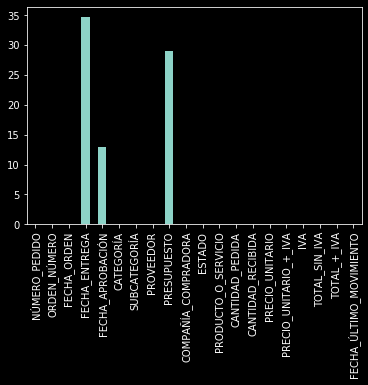

In [835]:
(df.isna().sum()/len(df)*100).plot(kind='bar')

FECHA_ENTREGA AND FECHA_APROBACIÓN

In [836]:
# df['FECHA_ENTREGA'] = df['FECHA_ENTREGA'].fillna(0)
# df['FECHA_ENTREGA'].head(2)

In [837]:
# df['FECHA_APROBACIÓN'] = df['FECHA_APROBACIÓN'].fillna(0)
# df['FECHA_APROBACIÓN'].head(2)

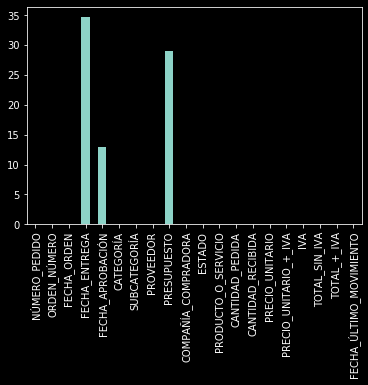

In [838]:
(df.isna().sum()/len(df)*100).plot(kind='bar')

PRESUPUESTO

In [839]:
df.loc[df['PRESUPUESTO'].isna(), 'PRESUPUESTO'] = df['PRESUPUESTO'].mode()[0]

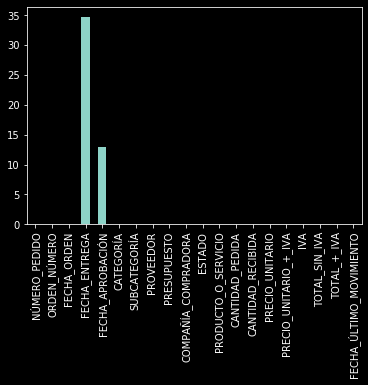

In [840]:
(df.isna().sum()/len(df)*100).plot(kind='bar')

# 5. FEATURE ENGINEERING (NEW VARIABLES)

DURACIÓN_ENTREGA

In [841]:
df['DURACIÓN_ENTREGA'] = (df['FECHA_ENTREGA']-df['FECHA_ORDEN']).dt.components.days

DURACIÓN_APROBACIÓN

In [842]:
df['DURACIÓN_APROBACIÓN'] = (df['FECHA_APROBACIÓN']-df['FECHA_ORDEN']).dt.components.days

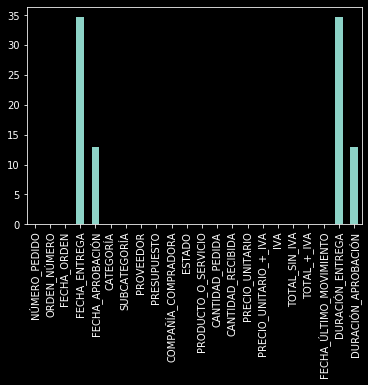

In [843]:
(df.isna().sum()/len(df)*100).plot(kind='bar')

FILL NA DURACIÓN_APROBACIÓN AND DURACIÓN_ENTREGA

In [844]:
df.loc[df['DURACIÓN_ENTREGA'].isna(), 'DURACIÓN_ENTREGA'] = df['DURACIÓN_ENTREGA'].mean()

In [845]:
df.loc[df['DURACIÓN_APROBACIÓN'].isna(), 'DURACIÓN_APROBACIÓN'] = df['DURACIÓN_APROBACIÓN'].mean()

Delete FECHA_ENTREGA AND FECHA_APROBACIÓN

In [846]:
cols_to_drop = ['FECHA_APROBACIÓN', 'FECHA_ORDEN', 'FECHA_ENTREGA']

In [847]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [848]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'PRODUCTO_O_SERVICIO', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
       'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_SIN_IVA',
       'TOTAL_+_IVA', 'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA',
       'DURACIÓN_APROBACIÓN'],
      dtype='object')

In [849]:
df.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
count,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00
mean,"27,592.95",60.08,117.40,109.37,"110,369.52","127,890.26","17,520.71","1,062,506.38","1,295,928.12",2.01,24.47
std,"21,402.42",55.93,415.76,411.52,"470,385.31","551,989.56","82,276.31","3,226,913.00","3,978,706.75",3.36,89.34
min,1.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,037.00",14.00,1.00,0.00,"1,966.50","2,200.00",0.00,"5,000.00","5,268.00",0.00,0.00
50%,"37,482.00",37.00,2.00,0.00,"8,920.00","9,500.00",950.00,"28,350.00","35,000.00",2.01,0.00
75%,"46,662.00",99.50,4.50,3.00,"33,613.00","35,000.00","5,588.00","157,630.50","175,000.00",2.01,8.00
max,"48,910.00",190.00,"3,500.00","3,500.00","2,941,176.00","3,500,000.00","558,824.00","32,058,504.00","39,578,400.00",25.00,573.00


In [850]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            499 non-null    int32         
 1   ORDEN_NÚMERO             499 non-null    int32         
 2   CATEGORÍA                499 non-null    object        
 3   SUBCATEGORÍA             499 non-null    object        
 4   PROVEEDOR                499 non-null    object        
 5   PRESUPUESTO              499 non-null    object        
 6   COMPAÑÍA_COMPRADORA      499 non-null    object        
 7   ESTADO                   499 non-null    object        
 8   PRODUCTO_O_SERVICIO      499 non-null    object        
 9   CANTIDAD_PEDIDA          499 non-null    float64       
 10  CANTIDAD_RECIBIDA        499 non-null    float64       
 11  PRECIO_UNITARIO          499 non-null    float32       
 12  PRECIO_UNITARIO_+_IVA    499 non-nul

# 6. CORRELATION ANALYSIS

In [851]:
df.corr()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
NÚMERO_PEDIDO,1.00,0.26,0.13,0.12,-0.05,-0.06,-0.08,0.12,0.12,-0.01,-0.25
ORDEN_NÚMERO,0.26,1.00,-0.18,-0.18,0.10,0.09,0.05,-0.15,-0.15,-0.13,-0.01
CANTIDAD_PEDIDA,0.13,-0.18,1.00,0.99,-0.06,-0.06,-0.05,0.71,0.71,0.23,-0.08
CANTIDAD_RECIBIDA,0.12,-0.18,0.99,1.00,-0.06,-0.06,-0.05,0.67,0.67,0.24,-0.07
PRECIO_UNITARIO,-0.05,0.10,-0.06,-0.06,1.00,1.00,0.99,0.13,0.12,-0.00,-0.04
PRECIO_UNITARIO_+_IVA,-0.06,0.09,-0.06,-0.06,1.00,1.00,0.99,0.13,0.12,-0.00,-0.04
IVA,-0.08,0.05,-0.05,-0.05,0.99,0.99,1.00,0.13,0.12,0.00,-0.04
TOTAL_SIN_IVA,0.12,-0.15,0.71,0.67,0.13,0.13,0.13,1.00,1.00,0.19,-0.09
TOTAL_+_IVA,0.12,-0.15,0.71,0.67,0.12,0.12,0.12,1.00,1.00,0.19,-0.08
DURACIÓN_ENTREGA,-0.01,-0.13,0.23,0.24,-0.00,-0.00,0.00,0.19,0.19,1.00,0.00


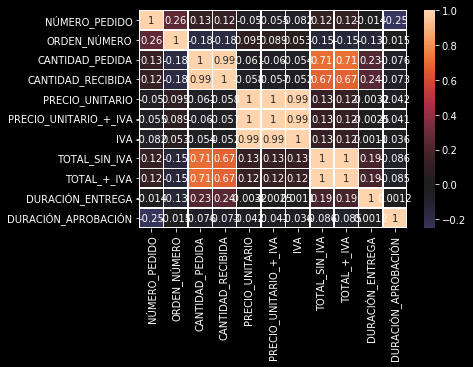

In [852]:

sns.heatmap(df.corr(), center=0, annot=True, linewidths=.5)

In [853]:
df.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
count,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00
mean,"27,592.95",60.08,117.40,109.37,"110,369.52","127,890.26","17,520.71","1,062,506.38","1,295,928.12",2.01,24.47
std,"21,402.42",55.93,415.76,411.52,"470,385.31","551,989.56","82,276.31","3,226,913.00","3,978,706.75",3.36,89.34
min,1.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,037.00",14.00,1.00,0.00,"1,966.50","2,200.00",0.00,"5,000.00","5,268.00",0.00,0.00
50%,"37,482.00",37.00,2.00,0.00,"8,920.00","9,500.00",950.00,"28,350.00","35,000.00",2.01,0.00
75%,"46,662.00",99.50,4.50,3.00,"33,613.00","35,000.00","5,588.00","157,630.50","175,000.00",2.01,8.00
max,"48,910.00",190.00,"3,500.00","3,500.00","2,941,176.00","3,500,000.00","558,824.00","32,058,504.00","39,578,400.00",25.00,573.00


Delete 'TOTAL_SIN_IVA'

In [854]:
df.drop('TOTAL_SIN_IVA', axis=1, inplace=True)

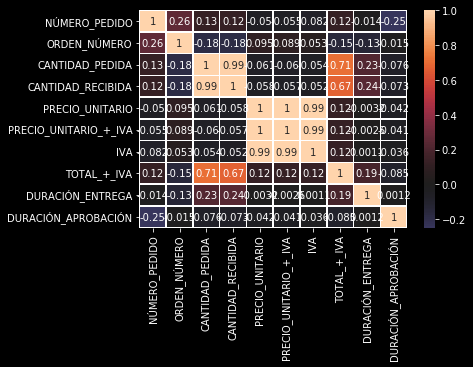

In [855]:
sns.heatmap(df.corr(), center=0, annot=True, linewidths=.5)

In [856]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'PRODUCTO_O_SERVICIO', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
       'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
       'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN'],
      dtype='object')

In [857]:
df.head(2)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,40213,3,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co,100.00,100.00,"35,000.00","35,000.00",0,"3,500,000.00",2020-04-27,0.00,0.00
1,40207,2,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Careta Re.co,10.00,0.00,"35,000.00","35,000.00",0,"350,000.00",2020-04-27,0.00,4.00


# 8. TRANSFORMATION

In [867]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

## Numeric to Normalized values

In [866]:
df_numeric = df.select_dtypes(['int32', 'int64', 'float32', 'float64'])
df_numeric

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,40213,3,100.00,100.00,"35,000.00","35,000.00",0,"3,500,000.00",0.00,0.00
1,40207,2,10.00,0.00,"35,000.00","35,000.00",0,"350,000.00",0.00,4.00
2,40207,2,4.00,0.00,"41,000.00","41,000.00",0,"164,000.00",0.00,4.00
3,40206,1,5.00,5.00,"35,000.00","35,000.00",0,"175,000.00",0.00,0.00
4,1078,1,2.00,2.00,"56,000.00","66,640.00",10640,"133,280.00",0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
494,45359,4,1.00,1.00,"35,000.00","35,000.00",0,"35,000.00",7.00,0.00
495,45358,3,1.00,1.00,"35,000.00","35,000.00",0,"35,000.00",7.00,0.00
496,45357,2,1.00,1.00,"35,000.00","35,000.00",0,"35,000.00",0.00,0.00
497,45356,1,1.00,1.00,"35,000.00","35,000.00",0,"35,000.00",7.00,0.00


In [873]:
df_numeric.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
count,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00
mean,"27,592.95",60.08,117.40,109.37,"110,369.52","127,890.26","17,520.71","1,295,928.12",2.01,24.47
std,"21,402.42",55.93,415.76,411.52,"470,385.31","551,989.56","82,276.31","3,978,706.75",3.36,89.34
min,1.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,037.00",14.00,1.00,0.00,"1,966.50","2,200.00",0.00,"5,268.00",0.00,0.00
50%,"37,482.00",37.00,2.00,0.00,"8,920.00","9,500.00",950.00,"35,000.00",2.01,0.00
75%,"46,662.00",99.50,4.50,3.00,"33,613.00","35,000.00","5,588.00","175,000.00",2.01,8.00
max,"48,910.00",190.00,"3,500.00","3,500.00","2,941,176.00","3,500,000.00","558,824.00","39,578,400.00",25.00,573.00


In [874]:
normalizer = Normalizer()
df_numeric_normalized = pd.DataFrame(normalizer.fit_transform(df_numeric), columns=df_numeric.columns)


In [875]:
df_numeric_normalized.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
count,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00
mean,0.44,0.01,0.00,0.00,0.22,0.24,0.03,0.55,0.00,0.01
std,0.43,0.02,0.00,0.00,0.19,0.22,0.04,0.35,0.00,0.06
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.01,0.00,0.00,0.00,0.03,0.03,0.00,0.21,0.00,0.00
50%,0.30,0.00,0.00,0.00,0.17,0.19,0.01,0.60,0.00,0.00
75%,0.95,0.00,0.00,0.00,0.38,0.43,0.05,0.92,0.00,0.00
max,1.00,0.09,0.01,0.01,0.60,0.71,0.11,1.00,0.01,0.60


## Categorical to OneHotEncoder

In [860]:
df_categorical = df.select_dtypes(['object'])
df_categorical

,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO
0,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co
1,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Careta Re.co
2,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Pali
3,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co
4,Alimentos y Bebidas,Alimentos preparados y conservados,Comprador Proveedor Prod 123 ASD,Prepuesto 1,Comprador Prod 123 ASD,Recibido,Arroz Italiano
...,...,...,...,...,...,...,...
494,Dotación y elementos de protección personal,Elementos de bioseguridad,Insumos plásticos JM,Presupuesto insumos Covid,Proveindustriales BPO S.A.S.,Recibido,KIT BIOSEGURIDAD
495,Dotación y elementos de protección personal,Elementos de bioseguridad,Insumos plásticos JM,Presupuesto insumos Covid,Proveindustriales BPO S.A.S.,Recibido,KIT BIOSEGURIDAD
496,Dotación y elementos de protección personal,Elementos de bioseguridad,Insumos plásticos JM,Presupuesto insumos Covid,Proveindustriales BPO S.A.S.,Recibido,KIT BIOSEGURIDAD
497,Dotación y elementos de protección personal,Elementos de bioseguridad,Insumos plásticos JM,Presupuesto insumos Covid,Proveindustriales BPO S.A.S.,Recibido,KIT BIOSEGURIDAD


In [861]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_Cols = pd.DataFrame(OH_encoder.fit_transform(df_categorical))

In [862]:
OH_Cols

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00

In [877]:
df_num_encoder_normalized = pd.concat([OH_Cols, df_numeric_normalized], axis=1)
df_num_encoder_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,1.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.10,0.10,0.00,0.98,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

# SAVE TO CSV

In [864]:
df.to_csv('Proveindustriales_Data_Cleaned_csv2.csv', index=False)

In [878]:
df_num_encoder.to_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv', index=False)